In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanic_train.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
X=df[['SibSp','Parch','Fare']]
y=df['Survived']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   891 non-null    int64  
 1   Parch   891 non-null    int64  
 2   Fare    891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [46]:
#split the data into tain and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 34 to 267
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   712 non-null    int64  
 1   Parch   712 non-null    int64  
 2   Fare    712 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.2 KB


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree_clf1=DecisionTreeClassifier(criterion='entropy')
tree_clf2=DecisionTreeClassifier(criterion='gini', max_depth=5)


In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
tree1_accu_scores=cross_val_score(tree_clf1,X_train,y_train,scoring='accuracy',cv=10)

tree2_accu_scores=cross_val_score(tree_clf2,X_train,y_train,scoring='accuracy',cv=10)

In [41]:
display(tree1_accu_scores.mean())
display(tree2_accu_scores.mean())


0.67981220657277

0.7093114241001566

In [42]:
tree_clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_predict=tree_clf2.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [49]:
accuracy_score(y_test,y_predict)

0.7206703910614525

In [50]:
precision_score(y_test,y_predict)

0.7222222222222222

In [51]:
recall_score(y_test,y_predict)

0.527027027027027

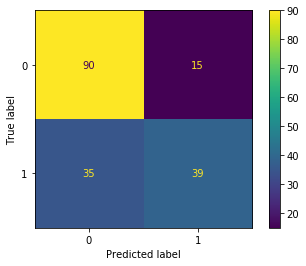

In [53]:
from sklearn.metrics import plot_confusion_matrix
class_names=['1:Survived', '0:Died']

disp= plot_confusion_matrix(tree_clf2,X_test,y_test)